# Домашнее задание 2

Это домашнее задание по материалам второго семинаров. Дедлайн по отправке - 23:55 17 февраля. 

Домашнее задание выполняется в этом же Jupyter Notebook'e и присылается мне на почту: __beznosikov.an@phystech.edu__.

Решение каждой задачи необходимо поместить после её условия.

Файл должен называться: Фамилия_Имя_Optimization_HW_2

При полном запуске Вашего решения (Kernel -> Restart & Run All) все ячейки должны выполняться без ошибок. 

## Задача 1

Рассмотрим проекцию на единичном $\ell_1$-шар:
\begin{equation*}
    \text{proj}_{C}(x) = \arg\min_{y \in C} \|x-y\|^2,
\end{equation*}
где $C = \{x ~|~ \|x\|_1 \leq 1 \}$.

__(а)__ Найдите выражение для такой проекции в явном виде.

ОТВЕТ

$\text{proj}_C(x) = \{ \arg\min_{y \in C} \|x-y\|^2 = \frac{x}{\|x\|}, \text{ if } x \notin C; x, \text{ if } x \in C \} $.

__(б)__ Сравните:
\begin{equation*}
    \text{proj}_C (x) \quad \text{и} \quad \text{prox}_{\lambda \mathbb{I}_C} (x),
\end{equation*}
где $\lambda > 0$, а $\mathbb{I}_C$ - индикаторная функция множества $C$:
$$
\mathbb{I}_C = 
\begin{cases}
0 ,& x \in C \\
+\infty, &x \notin C.
\end{cases}
$$
Являются ли данные операторы эквивалентными для любых $\lambda > 0$ и выпуклых $C$?

ОТВЕТ

$\text{prox}_{\lambda I_C}(x) = \arg\min_{y \in C} (\lambda I_C + \frac{1}{2}\|x-y\|^2) = \{ \frac{1}{2}\arg\min\|x-y\|^2, \text{if }y \in C, +\inf \text{if } y \notin C\} = \frac{1}{2}\text{proj}_C(x)$.

Таким образом, они являются эквивалентными.

## Задача 2

Рассмотрим задачу минимизации эмпирического риска:
\begin{equation}
\min_{w \in \mathbb{R}^d} \frac{1}{n} \sum\limits_{i=1}^n l (g(w, x_i), y_i),
\end{equation}
где $l$ - функция потерь, $g$ - модель, $w$ - параметры модели, $\{x_i, y_i\}_{i=1}^n$ - выборка данных из векторов признаков $x_i$ и меток $y_i$.

Далее будем рассматривать линейной модель $g(w, x) = w^T x$ и квадратичную функцию потерь $l(z, y) = (z-y)^2$.

__(а)__ Запишите задачу минимизации эмпирического риска с линейной моделью  и квадратичной функцией потерь в векторно-матричном виде, используя $X$ - матрицу из векторов $\{x_i\}$ и вектор $y$ - из $\{y_i\}$.

ОТВЕТ

Задача запишется следующим образом:
\begin{equation*}
    \min \frac{1}{n} \sum_{i=1}^n (\omega^T x_i - y_i)^2,
\end{equation*}
что эквивалентно следующему:
\begin{equation*}
    \min_{\omega \in \mathbb{R}^d} \|X^T\omega - y\|^2,
\end{equation*}

\begin{equation*}
    f(\omega) = \frac{1}{2} \omega^TX^TX\omega - y^TX\omega \rightarrow \text{min}.
\end{equation*}

То есть мы получили квадратичную задачу:
\begin{equation*}
    A = X^TX, \; b = y^TX
\end{equation*}

__(б)__ К заданию приложен датасет _mushrooms_. С помощью следующего кода сформируйте матрицу $X$ и вектор $y$:

In [5]:
import numpy as np
from sklearn.datasets import load_svmlight_file

dataset = "mushrooms.txt"
data = load_svmlight_file(dataset)
X, y = data[0].toarray(), data[1]
y -= 1.0
n, d = X.shape

In [4]:
z = np.count_nonzero(y)
print('Класс 0: ', z)
print('Класс 1: ', n - z)

# элементов 0 и 1 класса примерно поровну

Класс 0:  4208
Класс 1:  3916


Разделите (лучше случайно) данные (а значит $X$ и $y$) на две части: обучающую и тестовую (примерно в отношении $4$ к $1$). Опишите, как это было сделано.

In [7]:
from sklearn.model_selection import train_test_split

train_size = 0.8
test_size = 0.2
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=train_size, test_size=test_size, shuffle=True)
print(f"train data len: {len(X_train)}")
print(f"test data len: {len(X_test)}")

train data len: 6499
test data len: 1625


__(в)__ Для обучающей части $X_{train}$, $y_{train}$ оцените константу $L$ задачи обучения/оптимизации. Будет ли задача выпуклой? Сильно выпуклой?

In [12]:
import scipy 

A_train = X_train @ X_train.T
lambdas, _ = scipy.sparse.linalg.eigsh(A_train, 111, which='LA')

m = min(lambdas)
L = max(lambdas)
print(f'mu = {m}, L = {L}')

# задача квадратичная, поэтому можем оценить mu и L по собственным числам матрицы A

mu = 1.0585482117836034e-12, L = 67396.13877274515


$L > 0, \mu \approx 0 \rightarrow$ задача является выпуклой. Сильно выпуклой назвать ее рука не поднимается...

__(г)__ Используя материалы прошлого ДЗ (по желанию), решите задачу оптимизации/обучите модель машинного обучения с помощью градиентного спуска. Изобразите график сходимости. Какой критерий сходимости будет использовать? Сделайте вывод. Опишите проблемы, с которыми пришлось столкнуться.

In [28]:
#ответ
import math

A = X_train.T @ X_train
b = y_train.T @ X_train

def f(w):
    return 0.5 * w.T @ A @ w - b.T @ w

def grad_f(w):
    return A @ w - b

# наискорейший спуск
def alpha(w):
    g = grad_f(w)
    return (g.T @ g) / (g.T @ A @ g)


def grad_descent(iters=100):

    w = np.random.random_integers(-5, 5, d)
    f_vals = [f(w)]
    x_vals = [w]

    for i in range(iters):
        w = w - alpha(w) * grad_f(w)
        x_vals.append(w)
        f_vals.append(f(w))
        
    print(f"Optimal: f(w*) = {f(w)}, \n w* = {w}")
    return x_vals, f_vals

In [54]:
iters = 5000
x_vals, f_vals = grad_descent(iters)

/tmp/ipykernel_32685/3430371144.py:21: DeprecationWarning: This function is deprecated. Please call randint(-5, 5 + 1) instead
  w = np.random.random_integers(-5, 5, d)


Optimal: f(w*) = -1655.7552289394844, 
 w* = [-3.20421185 -1.00131698 -1.02468973 -1.00282486 -1.18030905 -1.02234549
 -1.19573044 -1.20540775  0.16257413 -1.1971339   1.08445182  0.79130654
  0.79188324  0.76846415  0.79078543  0.74104162 -0.01289421  0.0872401
  0.75913848  0.76288487  4.69688035  3.86742169 -1.45820016 -2.20518427
  3.39574143  3.22557653 -1.4584402  -0.84274596 -2.88368423  3.39697478
  3.39426412  1.26308023  0.3012218   0.22634054  0.33796149  1.04733716
  1.51696487 -1.84762994  1.80946763  1.7513145   1.73900219  1.72981414
  1.77328888  1.74942671  1.75030183  1.8277574   1.76316806  1.76298313
  1.75540751  1.17243013  0.3918719  -0.94595788  0.16174067  0.17338672
  0.17513252 -3.60063771 -3.61148582 -3.60415988 -3.61941457 -1.77442347
 -0.22981906 -0.23328983 -0.24870203 -0.22119233 -0.21215865 -0.25095049
 -0.27578215  2.01062005 -4.77442347 -1.94456919 -2.00563631 -2.01707367
 -1.22119233 -1.88830716 -2.00849342 -2.05746124 -2.51854117 -1.43569797
  3.010

Из-за отсутствия выраженной сильной выпуклости даже наискорейший спуск сходится проблематично. 

Посмотрим на график сходимости по критерию $|f(x_{k+1}) - f(x_k)|$.

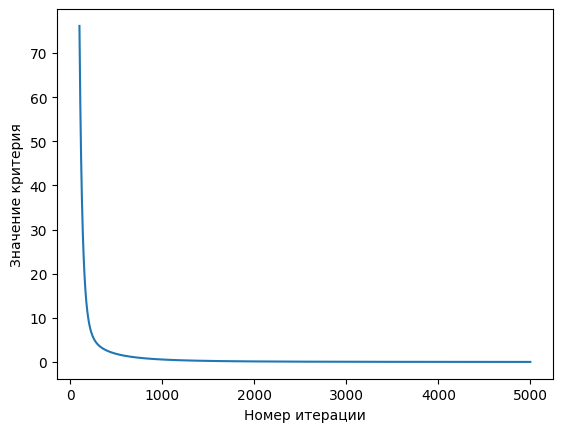

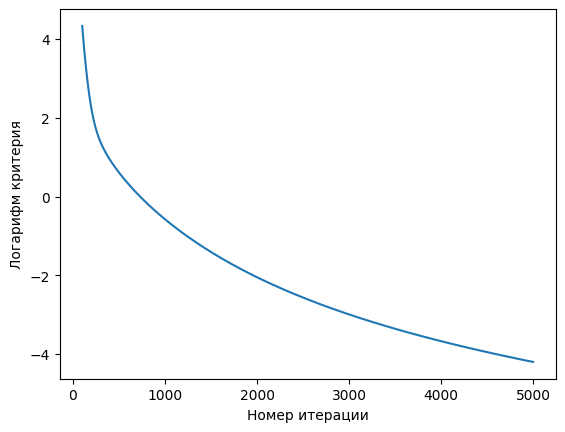

In [53]:
import matplotlib.pyplot as plt

err = [abs(f_vals[k+1] - f_vals[k]) for k in range(100, iters-1)]
err.append(err[-1])


plt.plot(range(100, iters), err)
plt.xlabel("Номер итерации")
plt.ylabel("Значение критерия")
plt.show()

plt.plot(range(100, iters), np.log(err))
plt.xlabel("Номер итерации")
plt.ylabel("Логарифм критерия")
plt.show()

# на первых шагах всегда происходит какая-то дичь, поэтому первые 100 итераций я выкинул

Как-то не похоже на линейную сходимость. Метод сходится медленно из-за плохой обусловленности матрицы. 

Проблема №2: даже при 5000 итераций начальная точка существенно сказывается на решении (при разных запусках погрешность решения может кратно меняться).

__(д)__ Как использовать итоговую модель для предсказания? Ответив на вопрос, сделайте предсказания на тестовой выборке. Сравните с реальными метками. Количество правильно угаданных меток есть точность/accuracy вашей модели. Запустите еще раз процесс обучения из пункта г), постройте как меняется точность модели от номера итерации градиентного спуска (измеряйте не каждую итерацию, а, например, каждую 100 или 1000). 

In [91]:
from sklearn.metrics import accuracy_score

def acc_score(w):
    train = accuracy_score([round(x) for x in (X_train @ w)], y_train)
    test = accuracy_score([round(x) for x in (X_test @ w)], y_test)
    return train, test

# веса - w*
w = x_vals[-1]

train1, test1 = acc_score(w)
print(f"Train accuracy: {train1}")
print(f"Test accuracy: {test1} \n")

Train accuracy: 0.987228804431451
Test accuracy: 0.9790769230769231 



In [94]:
print((X_train @ w)[:10])
print(y_train[0:10])

# реально работает!

[ 0.04981836  1.01458961  0.33127479  0.0226246  -0.11155102  0.06375485
  0.97892139  0.01677088  0.92239563  0.03946991]
[0. 1. 0. 0. 0. 0. 1. 0. 1. 0.]


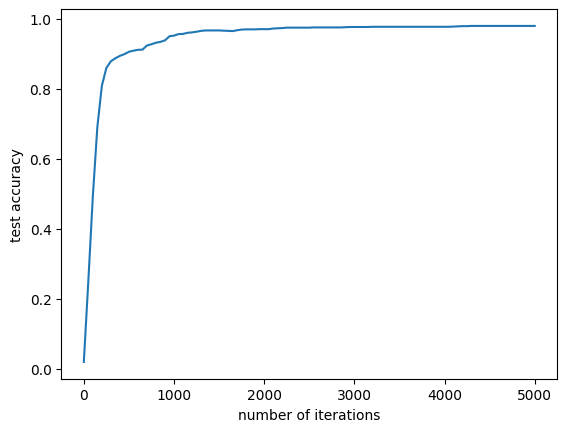

In [95]:
acc = list()
n = list()
for i in range(0, len(x_vals), 50):
    w = x_vals[i]
    n.append(i)
    acc.append(accuracy_score([round(x) for x in (X_test @ w)], y_test))

plt.plot(n, acc)
plt.xlabel("number of iterations")
plt.ylabel("test accuracy")
plt.show()

__(e)__ Теперь рассмотрим эту же задачу обучения на $\ell_1$-шаре с радиусом $\lambda$. Повторите пункты г) и д) только теперь градиентный спуск должен быть модифицирован с помощью оператора проекции. Пробуйте различные $\lambda > 0$ и найдите лучшее (опишите почему именно такое лучшее). Удалось ли улучшить процесс обучения/точность модели на тестовой выборке? 

In [87]:
#ответ

__Бонусные пункт__

__(ж)__ Снова рассмотрим задачу обучения без ограничений, но добавим к ней регуляризатор 1) $\lambda \| x \|_1$ c $\lambda  > 0$, 2) $\lambda \| x \|_2$ c $\lambda  > 0$. Сможем ли для новой задачи с регуляризатором использовать честный градиентный спуск без модификаций? Почему? Предложите свои идеи, как модифицировать градиентный спуск для новой задачи. Проведите для него эксперименты из пунктов г) и д).  Пробуйте различные $\lambda > 0$ и найдите лучшее (опишите почему именно такое лучшее). Сравните результаты с пунктом e).

In [88]:
#ответ

__(з)__ Воспользуемся для нашей задачи методом [PCA](https://ru.wikipedia.org/wiki/Метод_главных_компонент). Прочитайте про него подробнее и опишите основную идею.

In [89]:
#ответ

Следующий код запускает PCA для нашего датасета. Убедитесь, что понимаете происходящие.

In [90]:
from sklearn.decomposition import PCA

pca = PCA(n_components=10)
pca.fit(X_train)  #эта строчка будет работать только если есть матрица X_train
print (pca.explained_variance_ratio_.cumsum())

[0.16988783 0.30188314 0.39533193 0.45706241 0.49694434 0.5354278
 0.56809056 0.59658729 0.62378224 0.64580558]


Какое значение n_components разумно поставить? Для новой матрицы X_train повторите пункт ж). Измерьте время работы процесса обучения. Постройте график точности решения на тестовой выборке от времени работы для честного X_train и полученного с помощью PCA.